In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("disney_movies_total_gross.csv")
#https://www.kaggle.com/prateekmaj21/disney-movies

In [49]:
# shows top five rows of the data 
print(df.head())

# gives us a general understanding of our numerical columns in our data set 
print (df.describe())

#lets us know how our unaltered data set looks. 
#We can see that before any changes are made we have an unknown object type for most columns, and two int columns
print (df.dtypes)


                       movie_title release_date      genre mpaa_rating  \
0  Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                        Pinocchio   1940-02-09  Adventure           G   
2                         Fantasia   1940-11-13    Musical           G   
3                Song of the South   1946-11-12  Adventure           G   
4                       Cinderella   1950-02-15      Drama           G   

   total_gross  inflation_adjusted_gross  
0    184925485                5228953251  
1     84300000                2188229052  
2     83320000                2187090808  
3     65000000                1078510579  
4     85000000                 920608730  
        total_gross  inflation_adjusted_gross
count  5.790000e+02              5.790000e+02
mean   6.470179e+07              1.187625e+08
std    9.301301e+07              2.860853e+08
min    0.000000e+00              0.000000e+00
25%    1.278886e+07              2.274123e+07
50%    3.070245e+07  

In [74]:
#we clean up the data here to change the date column to a more useable date time format
df['release_date'] = pd.to_datetime(df['release_date'])
#we clean our data by getting rid of any rows that are missing data 
df.shape
clean = df.dropna()
clean.shape
#we can see that it ends up dropping 66 rows of data from our dataframe
#for simplicity sake we just re-define the original dataframe as the cleaned dataframe 
df.dropna(inplace = True)
#We add in a year column that is derived from the date column already in the dataframe.
df['year'] = df['release_date'].dt.date.astype(str).str.split('-', expand=True)[0]
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950


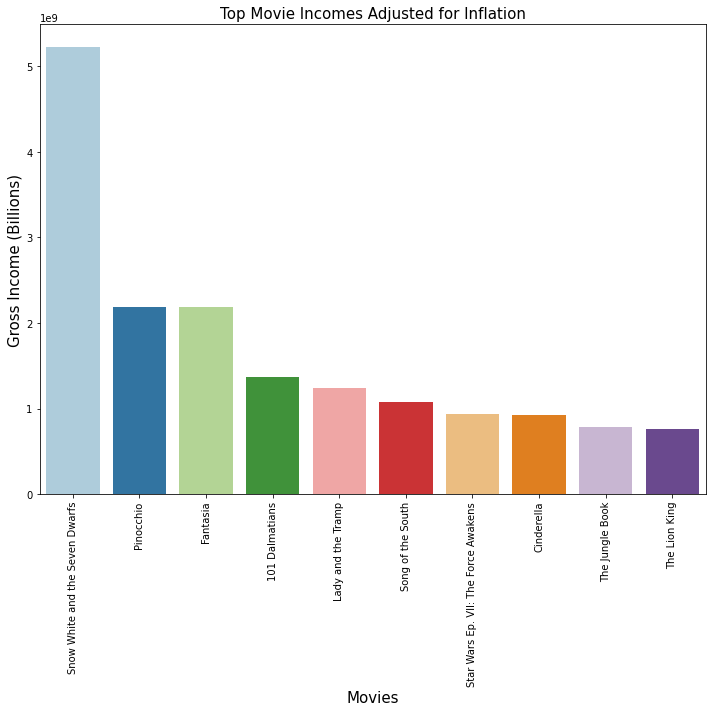

In [35]:
#we create a sorted dataframe, sorted based on adjusted gross 
moviebygross = df.sort_values(by = 'inflation_adjusted_gross', ascending = False)

# we set the variables for our bar chart and then finally chart the top ten movies by gross 
moviebygross10 = moviebygross.head(10)
plt.figure(figsize=(10,10))
sns.barplot(x=moviebygross10.movie_title,
            y=moviebygross10.inflation_adjusted_gross, 
           palette="Paired")
plt.xlabel("Movies",size=15)
plt.ylabel("Gross Income (Billions)", size = 15)
plt.title("Top Movie Incomes Adjusted for Inflation", size = 15)
plt.xticks(rotation = 90)
plt.tight_layout()
#These lines create a grouped data set that is organized by genre plt.show()

In [70]:
#These lines create a grouped data set that is organized by genre 
grouped_count=df['inflation_adjusted_gross'].groupby(df['genre'])
grouped_count.count()
#we then find the average value per genre by using a group by object
grouped_mean=df['inflation_adjusted_gross'].groupby(df['genre'])
grouped_mean.mean()
#some distortions we acknowledg are the skewed averages of genres with a small amount of movies like "Black Comedy"

genre
Action                 1.486012e+08
Adventure              1.971801e+08
Black Comedy           5.224349e+07
Comedy                 8.731064e+07
Concert/Performance    5.741084e+07
Documentary            1.271803e+07
Drama                  7.735607e+07
Horror                 2.506927e+07
Musical                6.377507e+08
Romantic Comedy        7.821326e+07
Thriller/Suspense      9.241864e+07
Western                7.381571e+07
Name: inflation_adjusted_gross, dtype: float64

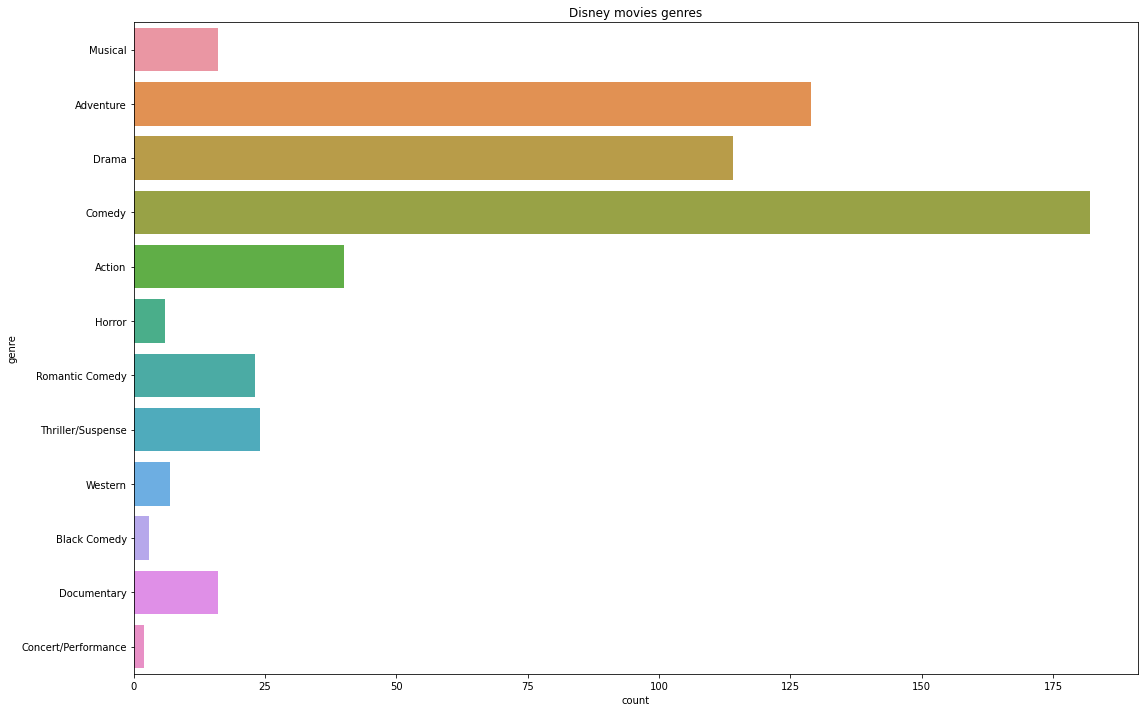

In [38]:
# we use the main dataframe to visualize the 
plt.figure(figsize=(16, 10))
plt.title('Disney movies genres')
sns.countplot(y='genre', data=df)
plt.tight_layout()
# the results of this visualization show that most movies made by disney would be categorized as "comedy"

In [39]:
#Here we create a sliced data frame that drops some tables to allow for easy readability
df1=df.loc[:,['movie_title','inflation_adjusted_gross','genre','year']]
print (df1)
#the columns we leave out are the less neccesary unadjusted gross income, MPAA rating, and the full release date in favor of release year 


,movie_title,inflation_adjusted_gross,genre,year
0,Snow White and the Seven Dwarfs,5228953251,Musical,1937
1,Pinocchio,2188229052,Adventure,1940
2,Fantasia,2187090808,Musical,1940
3,Song of the South,1078510579,Adventure,1946
4,Cinderella,920608730,Drama,1950
...,...,...,...,...
574,The Light Between Oceans,12545979,Drama,2016
575,Queen of Katwe,8874389,Drama,2016
576,Doctor Strange,232532923,Adventure,2016
577,Moana,246082029,Adventure,2016


In [78]:
# we create another grouped object to use in making the table below 
year_income = df.groupby('year').sum()

<AxesSubplot:title={'center':'disney movies income adjusted'}, xlabel='year', ylabel='inflation adjusted income'>

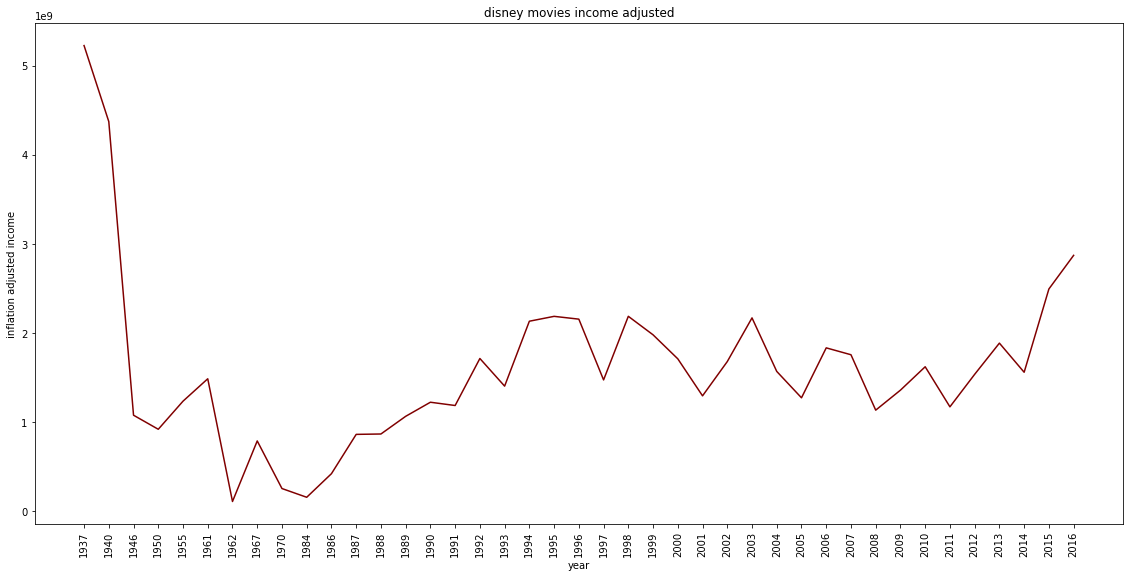

In [83]:
# we set variables and plot a table that shows the gross income in yearly format as opposed to by movie.
plt.figure(figsize=(16, 8))
plt.title('disney movies income adjusted')
plt.xlabel('year')
plt.ylabel('inflation adjusted income')
plt.xticks(rotation=90)
plt.tight_layout()
sns.lineplot(x=year_income.index, y=year_income['inflation_adjusted_gross'],color='maroon')

In [28]:
#correlation of table values 
correlationframe=df.loc[:, ["inflation_adjusted_gross",]]
#drop out columns we do not want to do correlation on
correlationframe["year_released"]= df["release_date"].dt.year
#slice some data from the main dataframe, pulling out year from data time. 
correlationframe.corr()
#from this data we see that year of the movie release and adjusted gross income are not correlated 

,inflation_adjusted_gross,year_released
inflation_adjusted_gross,1.000000,-0.362346
year_released,-0.362346,1.000000


,inflation_adjusted_gross,year_released
inflation_adjusted_gross,1.000000,-0.362346
year_released,-0.362346,1.000000
